# DC21kslv

At first glance, this object that met the rough cuts for potential AGN 
looked *kind of* TDE-like with its long duration and slow decline.

However, once compared with PS1-10jh, the rise is probably just too long.

In [1]:
# import os
import numpy as np
import matplotlib.pyplot as plt
import time
import astropy.units as u
# from astropy.table import unique
# from astropy.timeseries import LombScargle

In [2]:
all_filters = np.asarray(['g','r','i'], dtype='str')
all_fcolors = np.asarray(['green','red','blue'], dtype='str')
all_fshapes = np.asarray(['o','s','^'], dtype='str')
all_fsizes  = np.asarray([5, 5, 7], dtype='int')

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

In [4]:
fnm = '../all_nightly_epochs_files/nightly_epoch_magnitude_limits.dat'
neml_field = np.loadtxt(fnm, dtype='str', usecols=(0))
neml_caldate = np.loadtxt(fnm, dtype='str', usecols=(1))
neml_mjd = np.loadtxt(fnm, dtype='float', usecols=(2))
neml_filter = np.loadtxt(fnm, dtype='str', usecols=(3))
neml_nimgs = np.loadtxt(fnm, dtype='int', usecols=(4))
neml_limmag = np.loadtxt(fnm, dtype='float', usecols=(5))
neml_limmage = np.loadtxt(fnm, dtype='float', usecols=(6))
del fnm

Plot DC21kslv by itself.

59552.201985 20.087


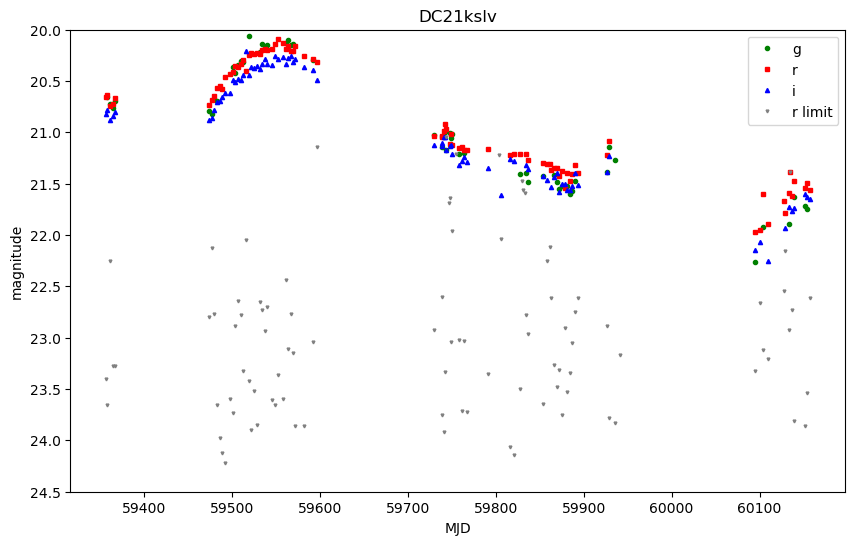

In [5]:
cand = 'DC21kslv'
field = 'ELAIS'
limfilt = 'r'

fig = plt.figure(figsize=(10, 6))

for filt in ['g', 'r', 'i']:
    cx = np.where((candLC_candid == cand) & (candLC_filter == filt))[0]
    days = candLC_mjd[cx]
    mags = candLC_mag[cx]
    x = np.where(all_filters == filt)[0]
    sym = all_fshapes[x[0]]
    clr = all_fcolors[x[0]]
    plt.plot(days, mags, sym, ms=3, color=clr, label=filt)
    if filt == 'r':
        mx = np.argmin(mags)
        print(days[mx], mags[mx])
    del cx, days, mags
    del x, sym, clr

tx = np.where((neml_field == field) & (neml_filter == limfilt))[0]
epochs = neml_mjd[tx]
lims = neml_limmag[tx]
plt.plot(epochs, lims, 'v', ms=2, color='grey', label=limfilt + ' limit')
del tx, epochs, lims

plt.xlabel('MJD')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(cand)
plt.ylim([24.5, 20])
# plt.xlim([59940, 60100])
plt.show()

del cand, field, limfilt

Plot DC21kslv and PS1-10jh (Gezari et al. 2012) together.

In [6]:
fnm = 'PS1-10jh.dat'
ps1_10jh_day  = np.loadtxt(fnm, dtype='float', usecols=(3))
ps1_10jh_filt = np.loadtxt(fnm, dtype='str', usecols=(4))
ps1_10jh_mag  = np.loadtxt(fnm, dtype='float', usecols=(5))
ps1_10jh_mage = np.loadtxt(fnm, dtype='float', usecols=(6))

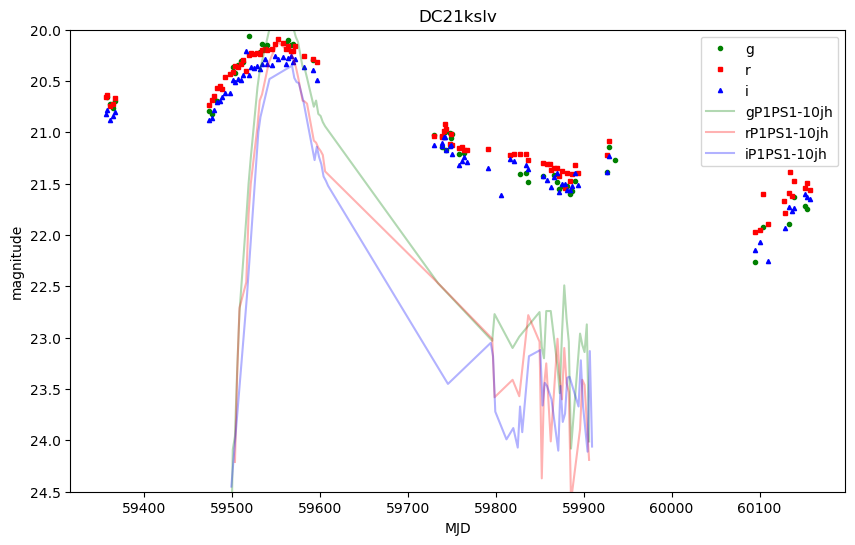

In [7]:
cand = 'DC21kslv'
field = 'ELAIS'
limfilt = 'r'
date = 59552.2

fig = plt.figure(figsize=(10, 6))

for f, filt in enumerate(all_filters):
    cx = np.where((candLC_candid == cand) & (candLC_filter == filt))[0]
    days = candLC_mjd[cx]
    mags = candLC_mag[cx]
    sym = all_fshapes[f]
    clr = all_fcolors[f]
    plt.plot(days, mags, sym, ms=3, color=clr, label=filt)
    del cx, days, mags
    del sym, clr

for f, filt in enumerate(['gP1', 'rP1', 'iP1']):
    tx = np.where((ps1_10jh_filt == filt) & (ps1_10jh_mage > 0.0))[0]
    day = ps1_10jh_day[tx] + date
    mag = ps1_10jh_mag[tx]
    sym = -1 * all_fshapes[f]
    clr = all_fcolors[f]
    plt.plot(day, mag, sym, ms=3, color=clr, alpha=0.3, label=filt + 'PS1-10jh')
    del tx, day, mag
    del sym, clr

plt.xlabel('MJD')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(cand)
plt.ylim([24.5, 20])
# plt.xlim([59940, 60100])
plt.show()

del cand, field, limfilt

Well... now we can see that the rise is actually pretty long.

Plus, the early detection is not consistent with TDE and it does appear to be rising again at MJD>60100.

OK probably not TDE!